In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import torch
import os
import numpy as np
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import seaborn as sb

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

In [ ]:
# !pip install pickle5
%pwd

'/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/npy_data'

In [ ]:
#@title function : load / save pickle_obj

### pickle

import bz2
import pickle
# !pip install pickle5
import pickle5
import _pickle as cPickle
import os
import numpy as np
import pandas as pd
def save_obj(obj, name):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

def load_obj(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle.load(f)

def load_obj_pkl5(name):
    with open(name + '.pkl', 'rb') as f:
        return pickle5.load(f)

def compressed_pickle(data,title):
  with bz2.BZ2File(title + '.pbz2', 'w') as f:
    cPickle.dump(data, f)

def decompress_pickle(file):
 data = bz2.BZ2File(file+'.pbz2', 'rb')
 data = cPickle.load(data)
 return data

In [ ]:
# !wget https://www.dropbox.com/s/ni8fiwzn073pma5/finalResults_fSNE_SNE.xlsx

In [ ]:
plots_dir ='/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN'
os.chdir(plots_dir)
%pwd

'/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN'

## LAPS

In [ ]:
labels = ['fSNE','SNE']#,'PLSV-VAE','ProdLDA + t-SNE','PTM + t-SNE','GPUDMM + t-SNE','ETM + t-SNE','ASTM + t-SNE','TTM + t-SNE',]
colors = ['red','orange']#,'grey','cyan','green','yellow','#03C03C','magenta','blue']
all_models_names = ['fSNE','SNE']

In [ ]:
# def get_data_from_excel(from_,to,start,end,file_name,sheetname):
SHEETNAMES = ['Wine_Quality','20News','mnist']
# IR_SHEETNAMES = ['NFCorpus','opinions_twitter']
ALL_SHEETS = SHEETNAMES #+ IR_SHEETNAMES
all_data = []
for sheetname in ALL_SHEETS:
  df = pd.read_excel('results.xlsx', sheet_name=sheetname)

  mean_LAPS_fsne = df.iloc[2:7,0:6].values[:,-1]
  mean_kNN_fsne = df.iloc[28:33,0:6].values[:,-1]

  mean_LAPS_sne = df.iloc[2:7,7:14].values[:,-1]
  mean_kNN_sne = df.iloc[28:33,7:14].values[:,-1]


  all_models_dict = {d:{} for d in all_models_names}
  m='fSNE'
  all_models_dict[m]['mean_LAPS'] = mean_LAPS_fsne
  all_models_dict[m]['mean_kNN'] = mean_kNN_fsne
  all_models_dict[m]['color'] = 'red'
  all_models_dict[m]['label'] = 'fSNE'
  m='SNE'
  all_models_dict[m]['mean_LAPS'] = mean_LAPS_sne
  all_models_dict[m]['mean_kNN'] = mean_kNN_sne
  all_models_dict[m]['color'] = 'orange'
  all_models_dict[m]['label'] = 'SNE'
  all_data.append(all_models_dict)

## PLOT TEMPLATE

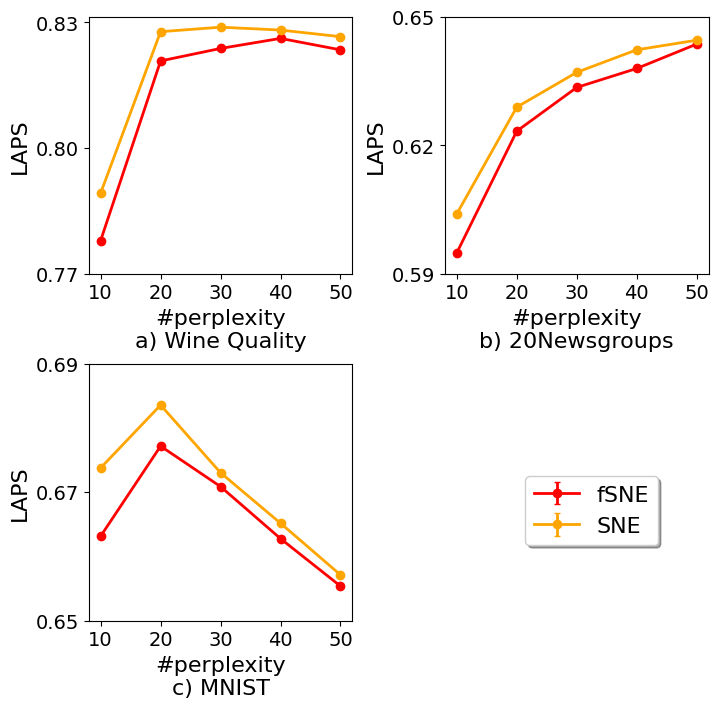

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
tick_fontsize = 14
perplexities = [10,20,30,40,50]
plot_label = ['a','b','c']
font_size = 16
i=1

fig= plt.figure(figsize=(8,8),dpi=100) # ,dpi=600

columns = 2
rows = 2
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
for a in range(len(all_data)):
    a_data = all_data[a]
    fig.add_subplot(rows, columns, i)
    i=i+1
    # if i==6:
    #   ax = plt.gca()
    #   fig.delaxes(ax)
    #   continue
    # i=i+1

    for model in all_models_names:
      plt.errorbar(perplexities, a_data[model]['mean_LAPS'],yerr=0,
              label=a_data[model]['label'], color = a_data[model]['color'], marker='o',linewidth=2, capsize=2)
      if SHEETNAMES[a] == 'Wine_Quality':
        plt.yticks([0.77, 0.80, 0.83],fontsize=tick_fontsize)
        dataset_name = 'Wine Quality'
      if SHEETNAMES[a] == '20News':
        dataset_name = '20Newsgroups'
        plt.yticks([0.59, 0.62, 0.65],fontsize=tick_fontsize)
      if SHEETNAMES[a] == 'mnist':
        dataset_name = 'MNIST'
        plt.yticks([0.65, 0.67, 0.69],fontsize=tick_fontsize)
      plt.xlabel('#perplexity\n'+plot_label[i-2]+') '+dataset_name,fontsize = font_size)
      plt.ylabel('LAPS', fontsize = font_size)
      plt.xticks(perplexities,fontsize=tick_fontsize)
      # if i==6:
plt.legend(loc='lower right',prop={'size': 16},bbox_to_anchor=(2.2, 0.25),ncol=1,fancybox=True, shadow=True)
# plt.legend(loc='upper center', bbox_to_anchor=(-0.2, -0.32), prop={'size': font_size},
          # fancybox=True, shadow=True, ncol=2)
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)
plt.savefig("LAPS_fSNE_SNE.pdf", bbox_inches='tight')
plt.show()

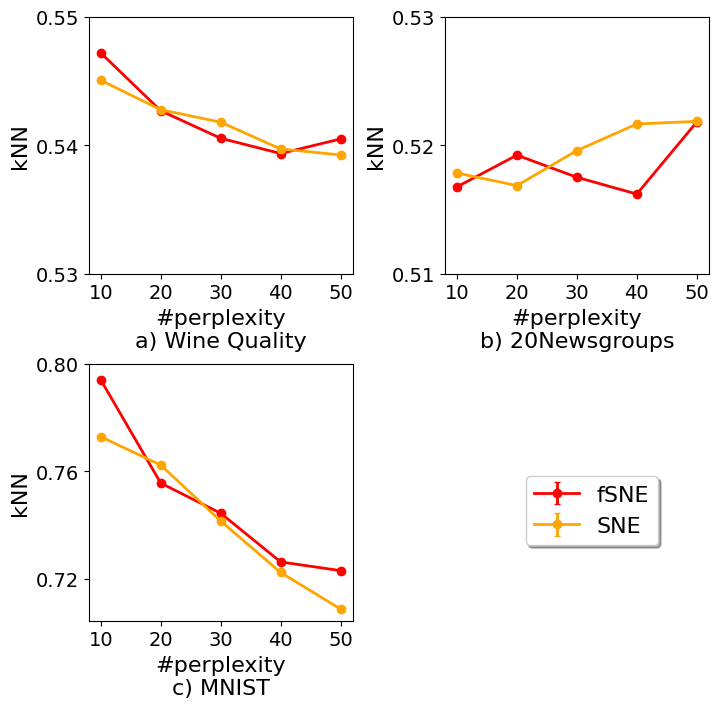

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
tick_fontsize = 14
perplexities = [10,20,30,40,50]
plot_label = ['a','b','c']
font_size = 16
i=1

fig= plt.figure(figsize=(8,8),dpi=100) # ,dpi=600

columns = 2
rows = 2
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
for a in range(len(all_data)):
    a_data = all_data[a]
    fig.add_subplot(rows, columns, i)
    i=i+1
    # if i==6:
    #   ax = plt.gca()
    #   fig.delaxes(ax)
    #   continue
    # i=i+1

    for model in all_models_names:
      plt.errorbar(perplexities, a_data[model]['mean_kNN'],yerr=0,
              label=a_data[model]['label'], color = a_data[model]['color'], marker='o',linewidth=2, capsize=2)
      if SHEETNAMES[a] == 'Wine_Quality':
        plt.yticks([0.53, 0.54, 0.55],fontsize=tick_fontsize)
        dataset_name = 'Wine Quality'
      if SHEETNAMES[a] == '20News':
        dataset_name = '20Newsgroups'
        plt.yticks([0.51, 0.52, 0.53],fontsize=tick_fontsize)
      if SHEETNAMES[a] == 'mnist':
        dataset_name = 'MNIST'
        plt.yticks([0.72, 0.76, 0.80],fontsize=tick_fontsize)
      plt.xlabel('#perplexity\n'+plot_label[i-2]+') '+dataset_name,fontsize = font_size)
      plt.ylabel('kNN', fontsize = font_size)
      plt.xticks(perplexities,fontsize=tick_fontsize)
      # if i==6:
plt.legend(loc='lower right',prop={'size': 16},bbox_to_anchor=(2.2, 0.25),ncol=1,fancybox=True, shadow=True)
# plt.legend(loc='upper center', bbox_to_anchor=(-0.2, -0.32), prop={'size': font_size},
          # fancybox=True, shadow=True, ncol=2)
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)
plt.savefig("kNN_fSNE_SNE.pdf", bbox_inches='tight')
plt.show()

In [ ]:
!pdf2ps LAPS_fSNE_SNE.pdf LAPS_fSNE_SNE.eps

In [ ]:
!pdf2ps kNN_fSNE_SNE.pdf kNN_fSNE_SNE.eps

## Visualization

In [ ]:
def visualization(embeddings,POI,labels):
  unique_labels = list(set(labels))
  labels_dict_o = {}
  # labels_noPOI = list(filter((99).__ne__, labels))
  for l in unique_labels:
    if l==99:
      # continue
      labels_dict_o[l] ='C99'#+str(unique_labels.index(l))
    else:
      labels_dict_o[l] ='C'+str(unique_labels.index(l))
  POI_vis = embeddings[POI]
  fig, ax = plt.subplots(figsize=(20, 20))
  sb.scatterplot(ax=ax,x=embeddings[:,0],y=embeddings[:,1],hue=labels,alpha=0.8,palette=labels_dict_o,s=50)
  ax.scatter(POI_vis[:, 0], POI_vis[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=50)


data_dir = 'mnist'
data_name = 'mnist'
run = '1'
poi = '1'
perp = '10'

if data_dir == '20News':
  data_name = '20news'
else:
  data_name = data_dir
model = 'fsne'
os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/fsne')
embedding_fsne = decompress_pickle(data_name+poi+'-fsne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/sne')
embedding_sne = decompress_pickle(data_name+poi+'-sne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/npy_data/')
data_perp = dict(np.load(data_dir+poi+'.npy',allow_pickle=True).item())
X_transformed, params, aug_labels = data_perp[list(data_perp.keys())[0]]

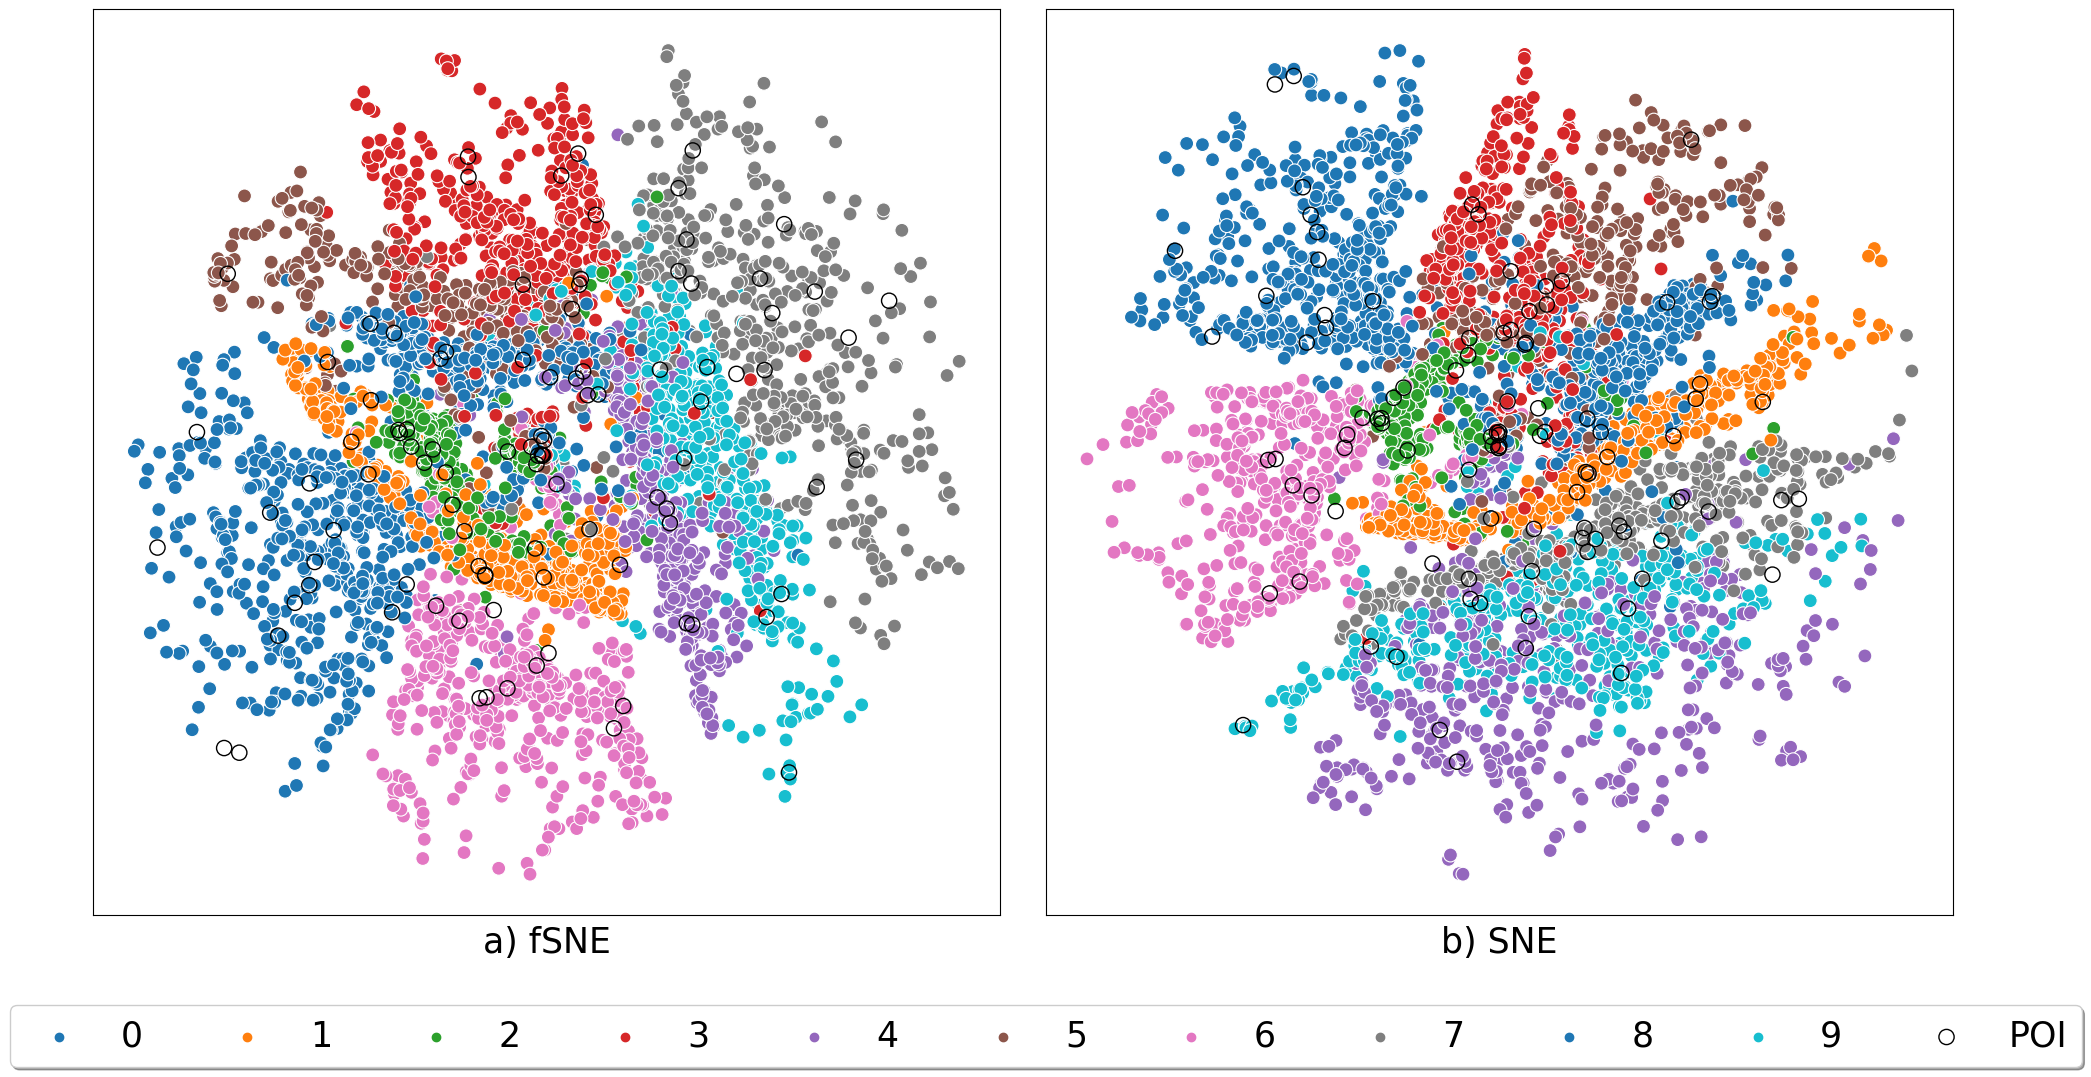

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
font_size =25
data_dir = 'mnist'
data_name = 'mnist'
run = '1'
poi = '1'
perp = '10'

if data_dir == '20News':
  data_name = '20news'
else:
  data_name = data_dir
model = 'fsne'
os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/fsne')
embedding_fsne = decompress_pickle(data_name+poi+'-fsne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/sne')
embedding_sne = decompress_pickle(data_name+poi+'-sne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/npy_data/')
data_perp = dict(np.load(data_dir+poi+'.npy',allow_pickle=True).item())
X_transformed, params, aug_labels = data_perp[list(data_perp.keys())[0]]


plot_label = ['a','b']
model_names = ['fSNE','SNE']#,'ASTM','PTM']

fig = plt.subplots(figsize=(24,12),dpi=100)
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.05, hspace=0.1) # set the spacing between axes.

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

embeddings = [embedding_fsne,embedding_sne]
axes = [ax1,ax2]
POI = params[5]
for i in range(len(axes)):
  labels = np.asarray(aug_labels).astype('int')
  lim1 = 50
  lim2 = 50
  # for f in plot_labels:
  #   labels.append('C'+str(int(f)))


  zx = embeddings[i]
  notPOI = [i for i in range(len(embeddings[i])) if i not in POI]

  POI_vis = zx[POI]
  zx = zx[notPOI]
  unique_labels = list(set(labels))
  labels_dict_o = {}
  for l in unique_labels:
    if l==99:
      continue
      # labels_dict_o[l] ='C99'#+str(unique_labels.index(l))
    else:
      labels_dict_o[l] ='C'+str(unique_labels.index(l))

  labels = labels[notPOI]
  g =sb.scatterplot(ax=axes[i],x=zx[:,0],y=zx[:,1],hue=labels,alpha=1,palette=labels_dict_o,s=100)
  g.legend_.remove()
  axes[i].set_xlabel(plot_label[i]+") "+model_names[i],fontsize = font_size)
  axes[i].set_yticklabels([])
  axes[i].set_xticklabels([])
  # axes[i].axes.xaxis.set_visible(False)
  axes[i].axes.yaxis.set_visible(False)
  axes[i].tick_params(axis=u'both', which=u'both',length=0)
  # if showtopic_l[i]: edgecolors ='black'
  # else : edgecolors =None
  axes[i].scatter(POI_vis[:, 0], POI_vis[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=120,label='POI')
  # for j in range(len(query_center)):
  #     axes[i].text(query_center[j][0],query_center[j][1], 'X'+keywords[j] ,c='black',weight='bold',fontsize=13)

handles,labels = axes[0].get_legend_handles_labels()

# plt.tight_layout()
plt.legend(handles=handles,labels=labels, loc='upper center', bbox_to_anchor=(0.0, -0.080), prop={'size': font_size},
          fancybox=True, shadow=True, ncol=11)
# plt.savefig("bbc_cluster.pdf", bbox_inches='tight')
plt.savefig("mnist.png", bbox_inches='tight')
plt.show()



In [ ]:
def flatten_list(t):
  return [item for sublist in t for item in sublist]

### POI-1

In [ ]:
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict
common_pts_original_fsne = defaultdict(list)
common_pts_original_sne = defaultdict(list)

# poi_k = 2
all_nbrs = [10,20,30,40,50]
for nbrs in all_nbrs:
  for poi_k in range(len(POI)):
    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(X_transformed)
    neigh = knn.kneighbors(X_transformed[POI], return_distance=False)
    neighPOI = neigh[:,1:]

    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(embedding_fsne)
    neigh = knn.kneighbors(embedding_fsne[POI], return_distance=False)
    neighPOI_fsne = neigh[:,1:]

    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(embedding_sne)
    neigh = knn.kneighbors(embedding_sne[POI], return_distance=False)
    neighPOI_sne = neigh[:,1:]

    common_pts_original_fsne[POI[poi_k]].append(len(set(neighPOI[poi_k]).intersection(set(neighPOI_fsne[poi_k]))))
    common_pts_original_sne[POI[poi_k]].append(len(set(neighPOI[poi_k]).intersection(set(neighPOI_sne[poi_k]))))

fsne_POIs = [sum(common_pts_original_fsne[poi]) for poi in POI]
sne_POIs = [sum(common_pts_original_sne[poi]) for poi in POI]

In [ ]:
c=0
max_c = 0
for i in range(len(fsne_POIs)):
  diff=fsne_POIs[i]-sne_POIs[i]
  if fsne_POIs[i]>=sne_POIs[i]:
    c=c+1
  if diff>max_c:
    max_c =diff
    print(i)

0
19


In [ ]:
max_c

38

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=POI, y=fsne_POIs,
                    mode='lines+markers',
                    name='fSNE_POIs'))
fig.add_trace(go.Scatter(x=POI, y=sne_POIs,
                    mode='lines+markers',
                    name='SNE_POIs'))

fig.update_layout(title='Common POIs in original neighborhood',
                   xaxis_title='POI',
                   yaxis_title='Common neighbor count')

fig.show(renderer='colab')
# file_name = 'Knapsack Dynamic Vs Greedy'
# fig.write_html(file_name+".html")

### POI-2

In [ ]:
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict
common_pts_original_fsne = defaultdict(list)
common_pts_original_sne = defaultdict(list)

# poi_k = 2
all_nbrs = [10,20,30,40,50]
for nbrs in all_nbrs:
  for poi_k in range(len(POI)):
    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(X_transformed)
    neigh = knn.kneighbors(X_transformed[POI], return_distance=False)
    neighPOI = neigh[:,1:]

    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(embedding_fsne)
    neigh = knn.kneighbors(embedding_fsne[POI], return_distance=False)
    neighPOI_fsne = neigh[:,1:]

    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(embedding_sne)
    neigh = knn.kneighbors(embedding_sne[POI], return_distance=False)
    neighPOI_sne = neigh[:,1:]

    common_pts_original_fsne[POI[poi_k]].append(len(set(neighPOI[poi_k]).intersection(set(neighPOI_fsne[poi_k]))))
    common_pts_original_sne[POI[poi_k]].append(len(set(neighPOI[poi_k]).intersection(set(neighPOI_sne[poi_k]))))

fsne_POIs = [sum(common_pts_original_fsne[poi]) for poi in POI]
sne_POIs = [sum(common_pts_original_sne[poi]) for poi in POI]

In [ ]:
c=0
for i in range(len(fsne_POIs)):
  if fsne_POIs[i]>=sne_POIs[i]:
    c=c+1
c

62

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=POI, y=fsne_POIs,
                    mode='lines+markers',
                    name='fSNE_POIs'))
fig.add_trace(go.Scatter(x=POI, y=sne_POIs,
                    mode='lines+markers',
                    name='SNE_POIs'))

fig.update_layout(title='Common POIs in original neighborhood',
                   xaxis_title='POI',
                   yaxis_title='Common neighbor count')

fig.show(renderer='colab')
# file_name = 'Knapsack Dynamic Vs Greedy'
# fig.write_html(file_name+".html")

### POI-3

In [ ]:
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict
common_pts_original_fsne = defaultdict(list)
common_pts_original_sne = defaultdict(list)

# poi_k = 2
all_nbrs = [10,20,30,40,50]
for nbrs in all_nbrs:
  for poi_k in range(len(POI)):
    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(X_transformed)
    neigh = knn.kneighbors(X_transformed[POI], return_distance=False)
    neighPOI = neigh[:,1:]

    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(embedding_fsne)
    neigh = knn.kneighbors(embedding_fsne[POI], return_distance=False)
    neighPOI_fsne = neigh[:,1:]

    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(embedding_sne)
    neigh = knn.kneighbors(embedding_sne[POI], return_distance=False)
    neighPOI_sne = neigh[:,1:]

    common_pts_original_fsne[POI[poi_k]].append(len(set(neighPOI[poi_k]).intersection(set(neighPOI_fsne[poi_k]))))
    common_pts_original_sne[POI[poi_k]].append(len(set(neighPOI[poi_k]).intersection(set(neighPOI_sne[poi_k]))))

fsne_POIs = [sum(common_pts_original_fsne[poi]) for poi in POI]
sne_POIs = [sum(common_pts_original_sne[poi]) for poi in POI]

In [ ]:
c=0
for i in range(len(fsne_POIs)):
  if fsne_POIs[i]>=sne_POIs[i]:
    c=c+1
c

66

In [ ]:
import plotly.graph_objects as go

fig = go.Figure()
fig.add_trace(go.Scatter(x=POI, y=fsne_POIs,
                    mode='lines+markers',
                    name='fSNE_POIs'))
fig.add_trace(go.Scatter(x=POI, y=sne_POIs,
                    mode='lines+markers',
                    name='SNE_POIs'))

fig.update_layout(title='Common POIs in original neighborhood',
                   xaxis_title='POI',
                   yaxis_title='Common neighbor count')

fig.show(renderer='colab')
# file_name = 'Knapsack Dynamic Vs Greedy'
# fig.write_html(file_name+".html")

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
tick_fontsize = 14
perplexities = [10,20,30,40,50]
plot_label = ['a','b','c']
font_size = 16
i=1

fig= plt.figure(figsize=(8,8),dpi=100) # ,dpi=600

columns = 2
rows = 2
plt.setp(plt.gcf().get_axes(), xticks=[], yticks=[]);
for a in range(len(all_data)):
    a_data = all_data[a]
    fig.add_subplot(rows, columns, i)
    i=i+1
    # if i==6:
    #   ax = plt.gca()
    #   fig.delaxes(ax)
    #   continue
    # i=i+1

    for model in all_models_names:
      plt.errorbar(perplexities, a_data[model]['mean_kNN'],yerr=0,
              label=a_data[model]['label'], color = a_data[model]['color'], marker='o',linewidth=2, capsize=2)
      if SHEETNAMES[a] == 'Wine_Quality':
        plt.yticks([0.53, 0.54, 0.55],fontsize=tick_fontsize)
        dataset_name = 'Wine Quality'
      if SHEETNAMES[a] == '20News':
        dataset_name = '20Newsgroups'
        plt.yticks([0.51, 0.52, 0.53],fontsize=tick_fontsize)
      if SHEETNAMES[a] == 'mnist':
        dataset_name = 'MNIST'
        plt.yticks([0.72, 0.76, 0.80],fontsize=tick_fontsize)
      plt.xlabel('#perplexity\n'+plot_label[i-2]+')'+dataset_name,fontsize = font_size)
      plt.ylabel('kNN', fontsize = font_size)
      plt.xticks(perplexities,fontsize=tick_fontsize)
      # if i==6:
plt.legend(loc='lower right',prop={'size': 16},bbox_to_anchor=(2.2, 0.25),ncol=1,fancybox=True, shadow=True)
# plt.legend(loc='upper center', bbox_to_anchor=(-0.2, -0.32), prop={'size': font_size},
          # fancybox=True, shadow=True, ncol=2)
plt.subplots_adjust(hspace=0.35)
plt.subplots_adjust(wspace=0.35)
plt.savefig("kNN_fSNE_SNE.pdf", bbox_inches='tight')
plt.show()

## 20News

In [ ]:
font_size =25

In [ ]:
target_names = ['alt.atheism',
 'comp.graphics',
 'comp.os.ms-windows.misc',
 'comp.sys.ibm.pc.hardware',
 'comp.sys.mac.hardware',
 'comp.windows.x',
 'misc.forsale',
 'rec.autos',
 'rec.motorcycles',
 'rec.sport.baseball',
 'rec.sport.hockey',
 'sci.crypt',
 'sci.electronics',
 'sci.med',
 'sci.space',
 'soc.religion.christian',
 'talk.politics.guns',
 'talk.politics.mideast',
 'talk.politics.misc',
 'talk.religion.misc']

In [ ]:
labels = np.asarray(aug_labels).astype('int')

In [ ]:
X_transformed.shape

(11314, 5000)

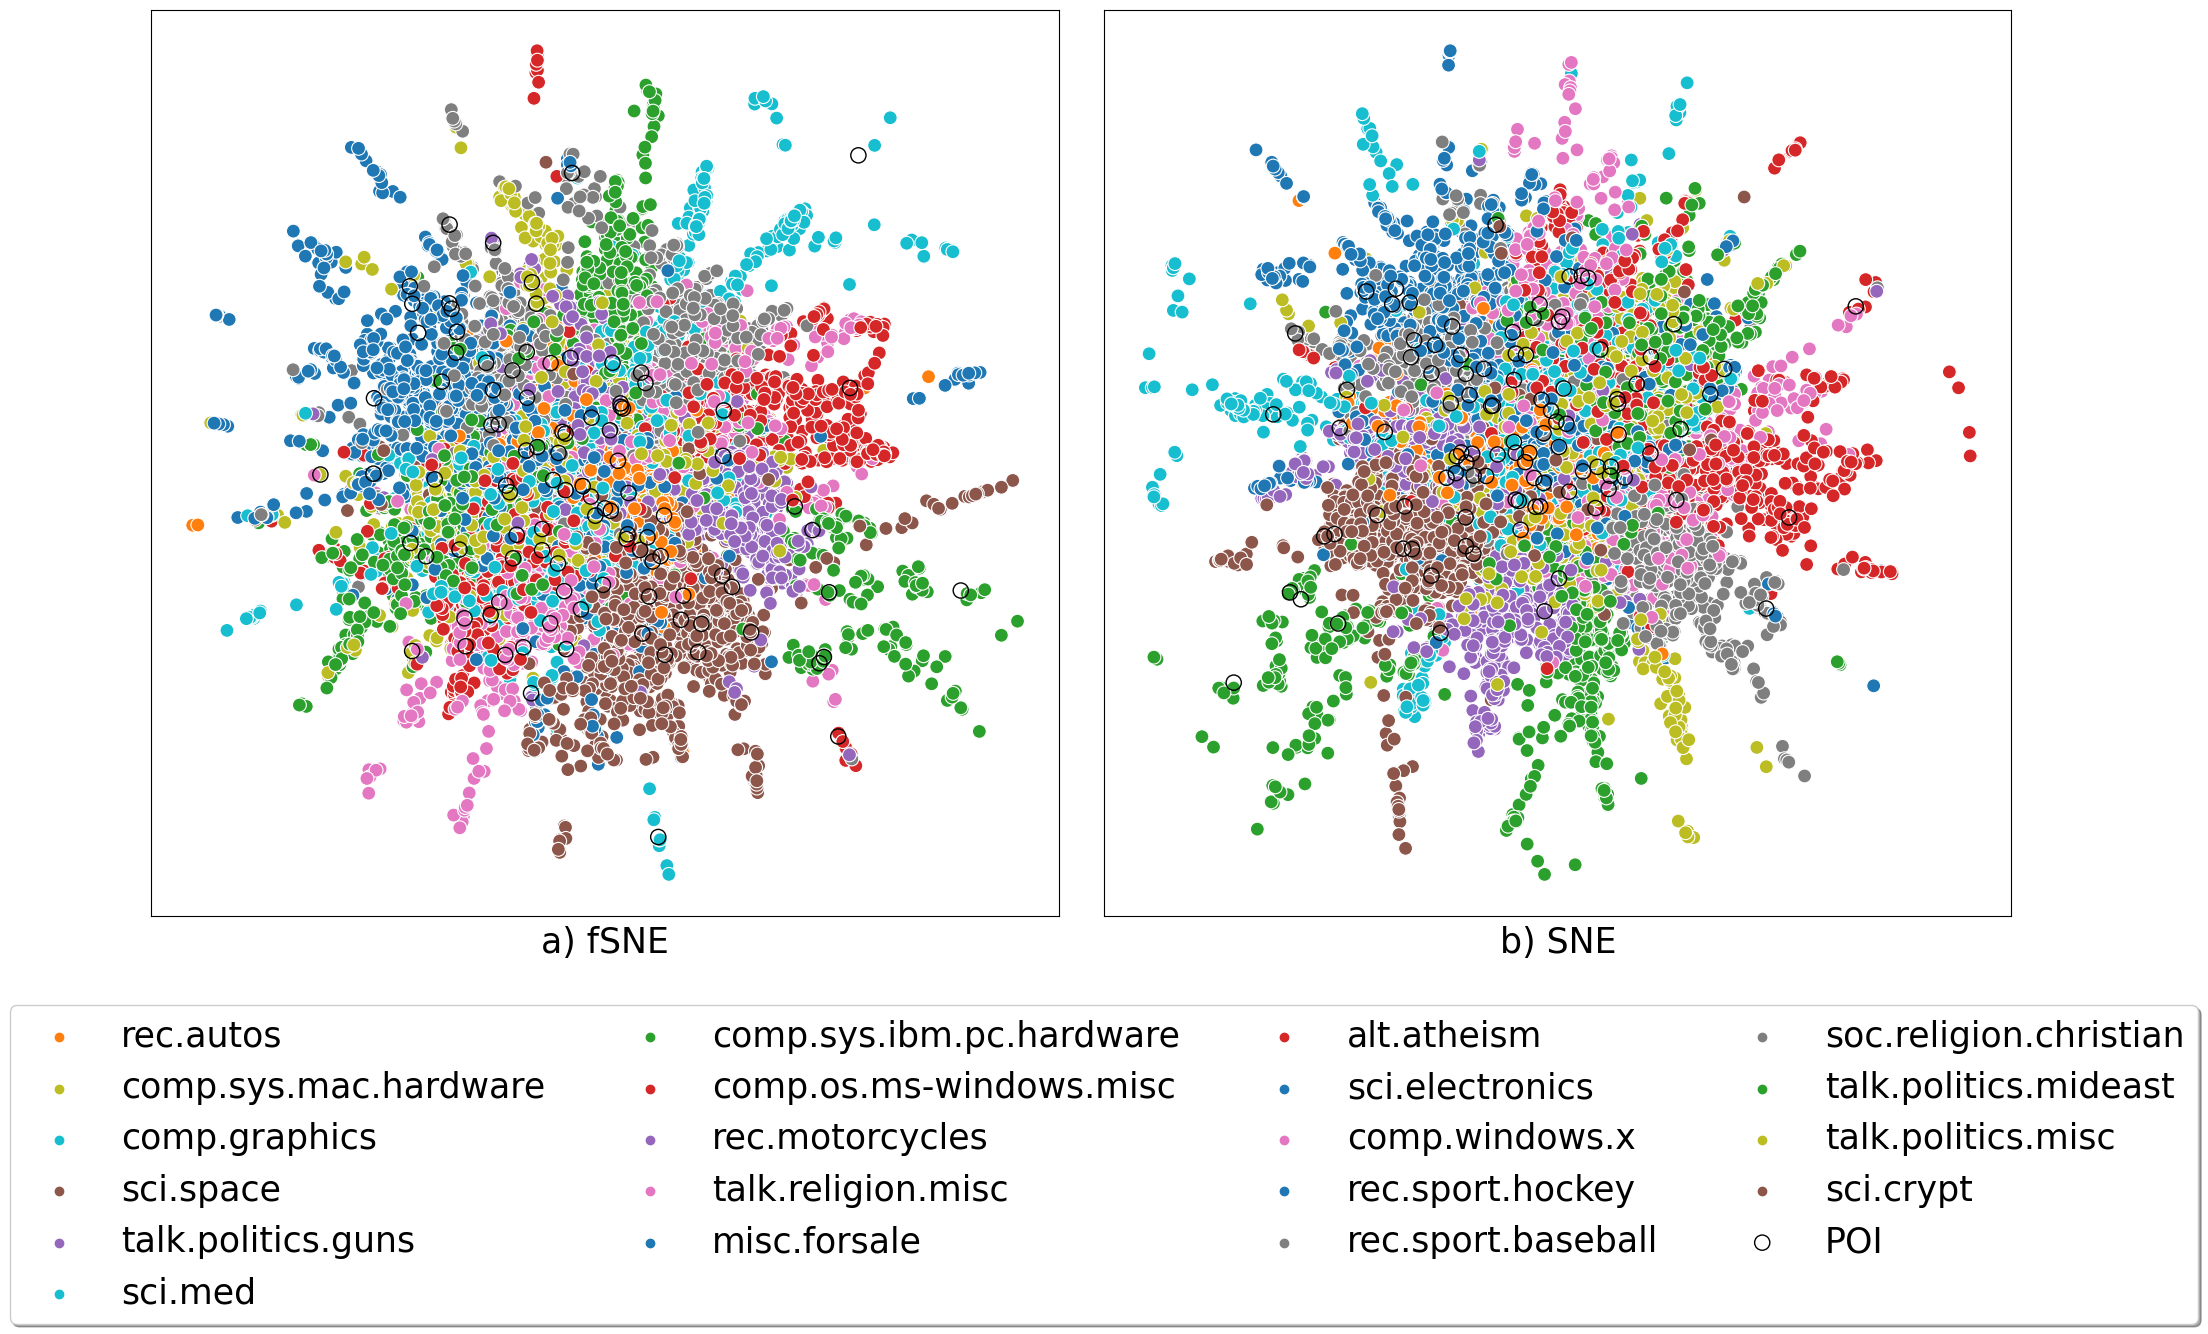

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


data_dir = '20News'
data_name = '20News'
run = '1'
poi = '1'
perp = '10'

if data_dir == '20News':
  data_name = '20news'
else:
  data_name = data_dir
model = 'fsne'
os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/fsne')
embedding_fsne = decompress_pickle(data_name+poi+'-fsne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/sne')
embedding_sne = decompress_pickle(data_name+poi+'-sne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/npy_data/')
data_perp = dict(np.load(data_dir+poi+'.npy',allow_pickle=True).item())
X_transformed, params, aug_labels = data_perp[list(data_perp.keys())[0]]


plot_label = ['a','b']
model_names = ['fSNE','SNE']#,'ASTM','PTM']


fig = plt.subplots(figsize=(24,12),dpi=100)
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.05, hspace=0.1) # set the spacing between axes.

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

embeddings = [embedding_fsne,embedding_sne]
axes = [ax1,ax2]
POI = params[5]
for i in range(len(axes)):
  labels = np.asarray(aug_labels).astype('int')
  labels = np.asarray([target_names[l] if l!=99 else 'POI' for l in labels])
  lim1 = 50
  lim2 = 50
  # for f in plot_labels:
  #   labels.append('C'+str(int(f)))


  zx = embeddings[i]
  notPOI = [i for i in range(len(embeddings[i])) if i not in POI]

  POI_vis = zx[POI]
  zx = zx[notPOI]
  unique_labels = list(set(labels))
  labels_dict_o = {}
  for l in unique_labels:
    if l==99:
      continue
      # labels_dict_o[l] ='C99'#+str(unique_labels.index(l))
    else:
      labels_dict_o[l] ='C'+str(unique_labels.index(l))

  labels = labels[notPOI]
  g =sb.scatterplot(ax=axes[i],x=zx[:,0],y=zx[:,1],hue=labels,alpha=1,palette=labels_dict_o,s=100)
  g.legend_.remove()
  axes[i].set_xlabel(plot_label[i]+") "+model_names[i],fontsize = font_size)
  axes[i].set_yticklabels([])
  axes[i].set_xticklabels([])
  # axes[i].axes.xaxis.set_visible(False)
  axes[i].axes.yaxis.set_visible(False)
  axes[i].tick_params(axis=u'both', which=u'both',length=0)
  # if showtopic_l[i]: edgecolors ='black'
  # else : edgecolors =None
  axes[i].scatter(POI_vis[:, 0], POI_vis[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=120,label='POI')
  # for j in range(len(query_center)):
  #     axes[i].text(query_center[j][0],query_center[j][1], 'X'+keywords[j] ,c='black',weight='bold',fontsize=13)

handles,labels = axes[0].get_legend_handles_labels()

# plt.tight_layout()
plt.legend(handles=handles,labels=labels, loc='upper center', bbox_to_anchor=(0.0, -0.080), prop={'size': font_size},
          fancybox=True, shadow=True, ncol=4)
# plt.savefig("bbc_cluster.pdf", bbox_inches='tight')
plt.savefig("20News.png", bbox_inches='tight')
plt.show()



In [ ]:
%pwd

'/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/npy_data'

## Wine

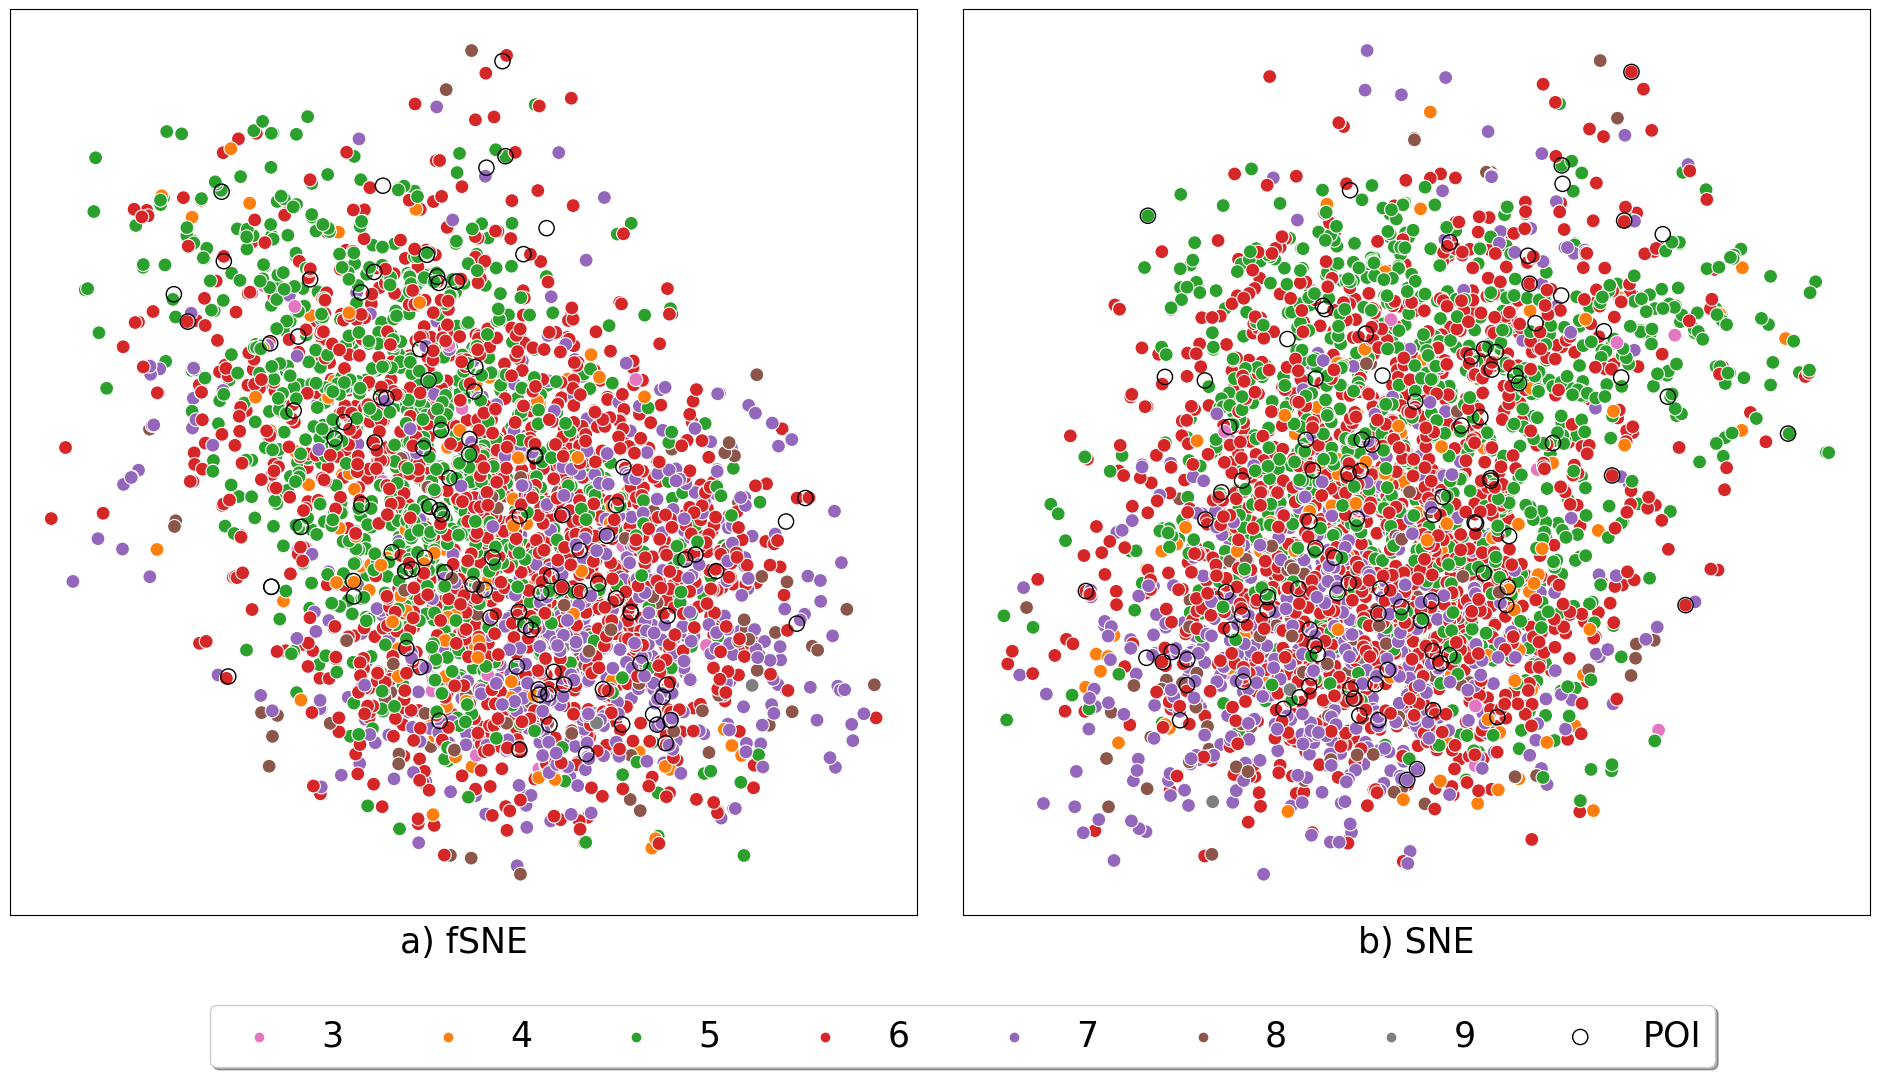

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

font_size=25
data_dir = 'Wine'
data_name = 'Wine'
run = '1'
poi = '1'
perp = '10'

if data_dir == '20News':
  data_name = '20news'
else:
  data_name = data_dir
model = 'fsne'
os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/fsne')
embedding_fsne = decompress_pickle(data_name+poi+'-fsne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/sne')
embedding_sne = decompress_pickle(data_name+poi+'-sne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/npy_data/')
data_perp = dict(np.load(data_dir+poi+'.npy',allow_pickle=True).item())
X_transformed, params, aug_labels = data_perp[list(data_perp.keys())[0]]


plot_label = ['a','b']
model_names = ['fSNE','SNE']#,'ASTM','PTM']


fig = plt.subplots(figsize=(24,12),dpi=100)
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.05, hspace=0.1) # set the spacing between axes.

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

embeddings = [embedding_fsne,embedding_sne]
axes = [ax1,ax2]
POI = params[5]
for i in range(len(axes)):
  labels = np.asarray(aug_labels).astype('int')
  lim1 = 50
  lim2 = 50
  # for f in plot_labels:
  #   labels.append('C'+str(int(f)))


  zx = embeddings[i]
  notPOI = [i for i in range(len(embeddings[i])) if i not in POI]

  POI_vis = zx[POI]
  zx = zx[notPOI]
  unique_labels = list(set(labels))
  labels_dict_o = {}
  for l in unique_labels:
    if l==99:
      continue
      # labels_dict_o[l] ='C99'#+str(unique_labels.index(l))
    else:
      labels_dict_o[l] ='C'+str(unique_labels.index(l))

  labels = labels[notPOI]
  g =sb.scatterplot(ax=axes[i],x=zx[:,0],y=zx[:,1],hue=labels,alpha=1,palette=labels_dict_o,s=100)
  g.legend_.remove()
  axes[i].set_xlabel(plot_label[i]+") "+model_names[i],fontsize = font_size)
  axes[i].set_yticklabels([])
  axes[i].set_xticklabels([])
  # axes[i].axes.xaxis.set_visible(False)
  axes[i].axes.yaxis.set_visible(False)
  axes[i].tick_params(axis=u'both', which=u'both',length=0)
  # if showtopic_l[i]: edgecolors ='black'
  # else : edgecolors =None
  axes[i].scatter(POI_vis[:, 0], POI_vis[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=120,label='POI')
  # for j in range(len(query_center)):
  #     axes[i].text(query_center[j][0],query_center[j][1], 'X'+keywords[j] ,c='black',weight='bold',fontsize=13)

handles,labels = axes[0].get_legend_handles_labels()

# plt.tight_layout()
plt.legend(handles=handles,labels=labels, loc='upper center', bbox_to_anchor=(0.0, -0.080), prop={'size': font_size},
          fancybox=True, shadow=True, ncol=8)
# plt.savefig("bbc_cluster.pdf", bbox_inches='tight')
# plt.savefig("bbc_cluster.png", bbox_inches='tight')
plt.savefig("Wine.png", bbox_inches='tight')
plt.show()



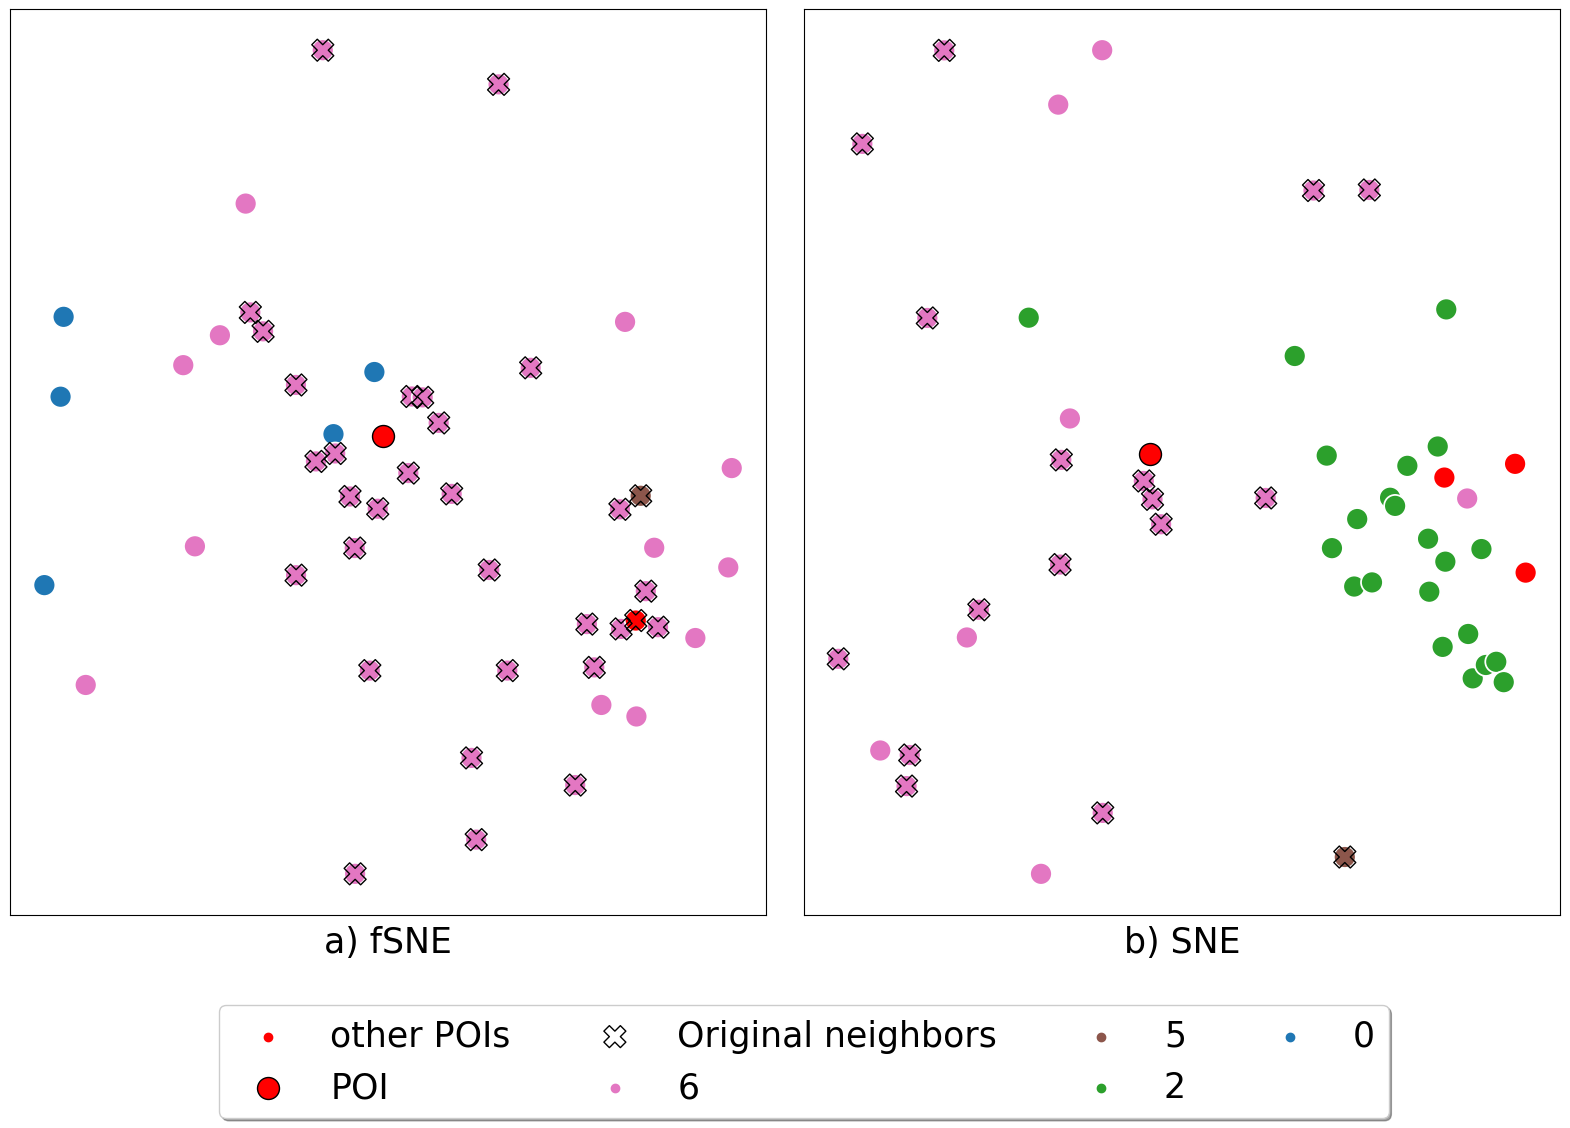

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

font_size = 25
data_dir = 'mnist'
data_name = 'mnist'
run = '1'
poi = '1'
perp = '10'

if data_dir == '20News':
  data_name = '20news'
else:
  data_name = data_dir
model = 'fsne'
os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/fsne')
embedding_fsne = decompress_pickle(data_name+poi+'-fsne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/sne')
embedding_sne = decompress_pickle(data_name+poi+'-sne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/npy_data/')
data_perp = dict(np.load(data_dir+poi+'.npy',allow_pickle=True).item())
X_transformed, params, aug_labels = data_perp[list(data_perp.keys())[0]]


plot_label = ['a','b']
model_names = ['fSNE','SNE']#,'ASTM','PTM']


fig = plt.subplots(figsize=(20,12),dpi=100)
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.05, hspace=0.1) # set the spacing between axes.

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

embeddings = [embedding_fsne,embedding_sne]
axes = [ax1,ax2]
POI = params[5]

poi_k =30
from sklearn.neighbors import NearestNeighbors
nbrs = 50

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(X_transformed)
neigh = knn.kneighbors(X_transformed[POI], return_distance=False)
neighPOI = neigh[:,1:]

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(embedding_fsne)
neigh = knn.kneighbors(embedding_fsne[POI], return_distance=False)
neighPOI_fsne = neigh[:,1:]

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(embedding_sne)
neigh = knn.kneighbors(embedding_sne[POI], return_distance=False)
neighPOI_sne = neigh[:,1:]
handles_l = []
labels_l = []
newLabels, newHandles = [], []
neighPOI_model = [neighPOI_fsne,neighPOI_sne]
for i in range(len(axes)):
  labels = np.asarray(aug_labels).astype('int')
  lim1 = 50
  lim2 = 50

  zx = embeddings[i]

  notPOI = [i for i in range(len(embeddings[i])) if i not in POI]

  POI_vis = zx[POI[poi_k]]
  common_neigh = list(set(neighPOI[poi_k]).intersection(set(neighPOI_model[i][poi_k])))
  POI_neigh_vis_original = zx[common_neigh]
  zx = zx[neighPOI_model[i][poi_k]]

  unique_labels = list(set(labels))

  labels_dict_o = {}
  for l in unique_labels:
    if l==99:
      # continue
      l='other POIs'
      labels_dict_o[l] ='red'#+str(unique_labels.index(l))
    else:
      labels_dict_o[l] ='C'+str(unique_labels.index(l))

  labels = labels[neighPOI_model[i][poi_k]]
  labels = ['other POIs' if l==99 else l for l in labels]
  g =sb.scatterplot(ax=axes[i],x=zx[:,0],y=zx[:,1],hue=labels,alpha=1,palette=labels_dict_o,s=250)
  g.legend_.remove()
  axes[i].set_xlabel(plot_label[i]+") "+model_names[i],fontsize = font_size)
  axes[i].set_yticklabels([])
  axes[i].set_xticklabels([])
  # axes[i].axes.xaxis.set_visible(False)
  axes[i].axes.yaxis.set_visible(False)
  axes[i].tick_params(axis=u'both', which=u'both',length=0)
  axes[i].scatter(POI_neigh_vis_original[:, 0], POI_neigh_vis_original[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=250,label='Original neighbors',marker='X')
  axes[i].scatter(POI_vis[0], POI_vis[1], alpha=1.0,  edgecolors='black', facecolors='red', s=250,label='POI')

  handles,labels = axes[i].get_legend_handles_labels()
  for handle, label in zip(handles, labels):
    if label not in newLabels:
      newLabels.append(label)
      newHandles.append(handle)
labels, handles = zip(*sorted(zip(newLabels, newHandles), key=lambda t: t[0],reverse=True))
plt.legend(handles=handles,labels=labels, loc='upper center', bbox_to_anchor=(0.0, -0.080), prop={'size': font_size},
        fancybox=True, shadow=True, ncol=4)
plt.savefig("original_fsne_sne_mnist.png", bbox_inches='tight')
plt.show()

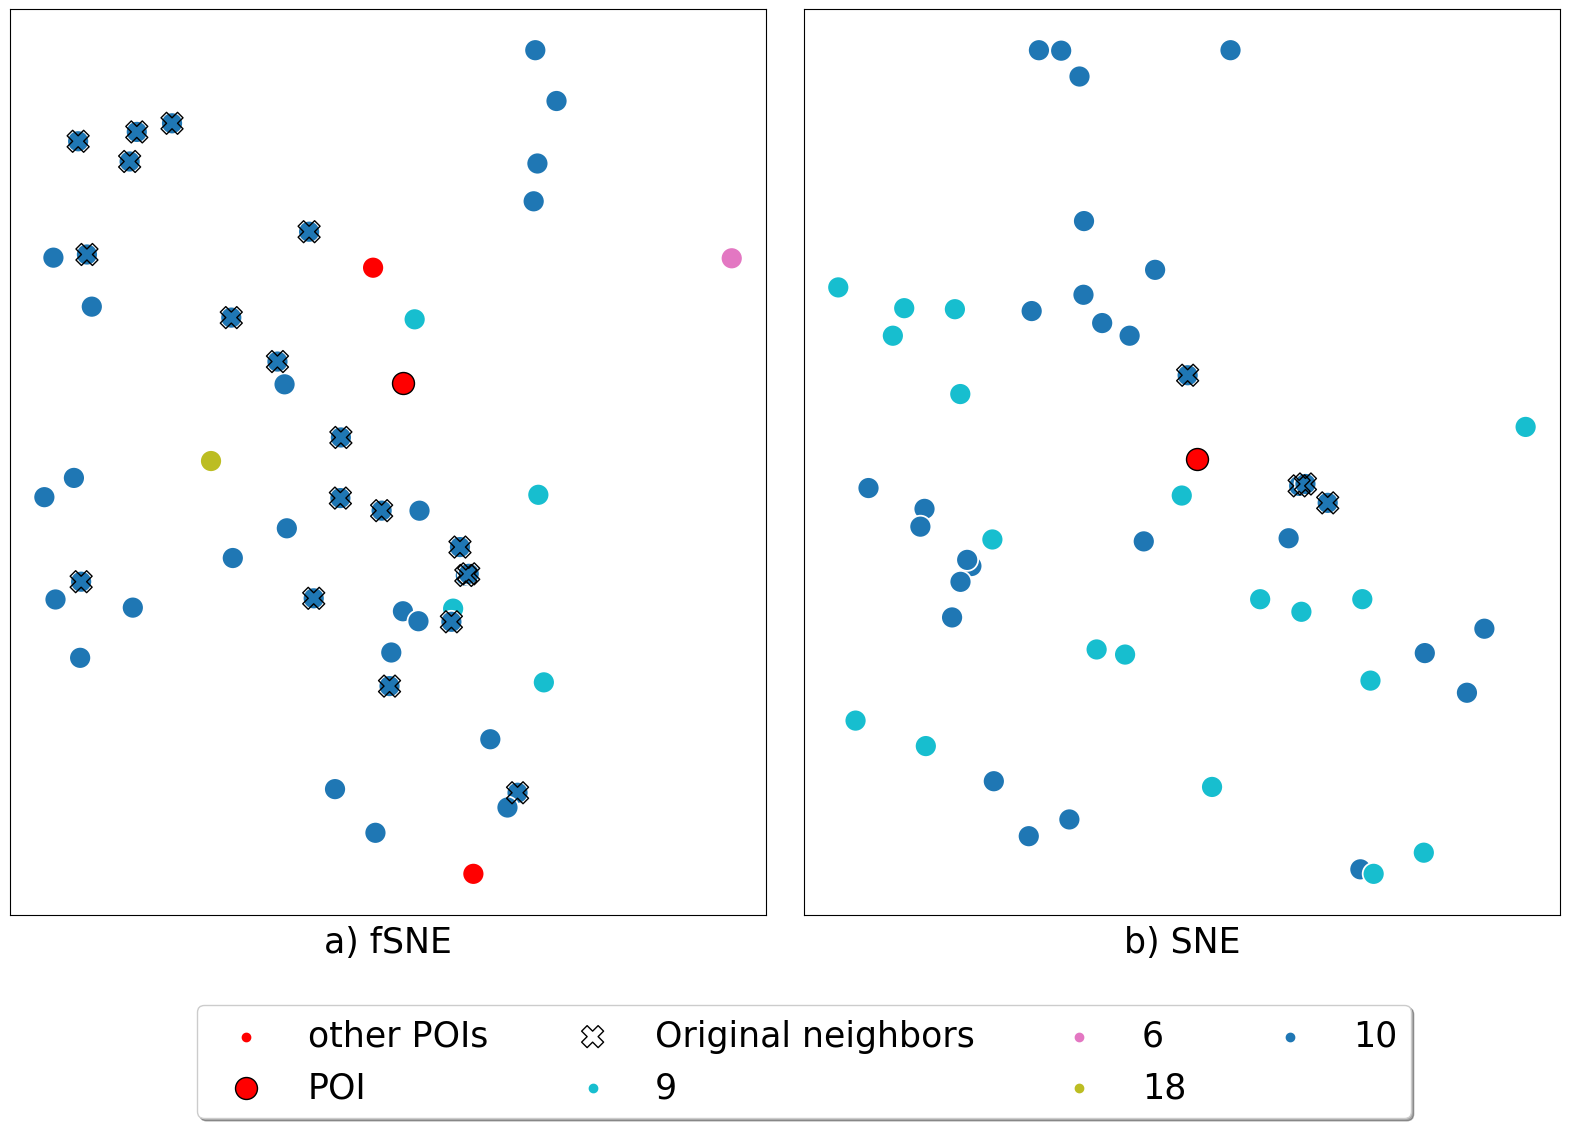

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


data_dir = '20News'
data_name = '20News'
run = '1'
poi = '1'
perp = '10'
font_size = 25
if data_dir == '20News':
  data_name = '20news'
else:
  data_name = data_dir
model = 'fsne'
os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/fsne')
embedding_fsne = decompress_pickle(data_name+poi+'-fsne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/sne')
embedding_sne = decompress_pickle(data_name+poi+'-sne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/npy_data/')
data_perp = dict(np.load(data_dir+poi+'.npy',allow_pickle=True).item())
X_transformed, params, aug_labels = data_perp[list(data_perp.keys())[0]]


plot_label = ['a','b']
model_names = ['fSNE','SNE']#,'ASTM','PTM']

fig = plt.subplots(figsize=(20,12),dpi=100)
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.05, hspace=0.1) # set the spacing between axes.

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

embeddings = [embedding_fsne,embedding_sne]
axes = [ax1,ax2]
POI = params[5]

poi_k =17
from sklearn.neighbors import NearestNeighbors
nbrs = 50

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(X_transformed)
neigh = knn.kneighbors(X_transformed[POI], return_distance=False)
neighPOI = neigh[:,1:]

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(embedding_fsne)
neigh = knn.kneighbors(embedding_fsne[POI], return_distance=False)
neighPOI_fsne = neigh[:,1:]

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(embedding_sne)
neigh = knn.kneighbors(embedding_sne[POI], return_distance=False)
neighPOI_sne = neigh[:,1:]
handles_l = []
labels_l = []
newLabels, newHandles = [], []
neighPOI_model = [neighPOI_fsne,neighPOI_sne]
for i in range(len(axes)):
  labels = np.asarray(aug_labels).astype('int')
  lim1 = 50
  lim2 = 50

  zx = embeddings[i]

  notPOI = [i for i in range(len(embeddings[i])) if i not in POI]

  POI_vis = zx[POI[poi_k]]
  common_neigh = list(set(neighPOI[poi_k]).intersection(set(neighPOI_model[i][poi_k])))
  POI_neigh_vis_original = zx[common_neigh]
  zx = zx[neighPOI_model[i][poi_k]]

  unique_labels = list(set(labels))

  labels_dict_o = {}
  for l in unique_labels:
    if l==99:
      # continue
      l='other POIs'
      labels_dict_o[l] ='red'#+str(unique_labels.index(l))
    else:
      labels_dict_o[l] ='C'+str(unique_labels.index(l))

  labels = labels[neighPOI_model[i][poi_k]]
  labels = ['other POIs' if l==99 else l for l in labels]
  g =sb.scatterplot(ax=axes[i],x=zx[:,0],y=zx[:,1],hue=labels,alpha=1,palette=labels_dict_o,s=250)
  g.legend_.remove()
  axes[i].set_xlabel(plot_label[i]+") "+model_names[i],fontsize = font_size)
  axes[i].set_yticklabels([])
  axes[i].set_xticklabels([])
  # axes[i].axes.xaxis.set_visible(False)
  axes[i].axes.yaxis.set_visible(False)
  axes[i].tick_params(axis=u'both', which=u'both',length=0)
  axes[i].scatter(POI_neigh_vis_original[:, 0], POI_neigh_vis_original[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=250,label='Original neighbors',marker='X')
  axes[i].scatter(POI_vis[0], POI_vis[1], alpha=1.0,  edgecolors='black', facecolors='red', s=250,label='POI')

  handles,labels = axes[i].get_legend_handles_labels()
  for handle, label in zip(handles, labels):
    if label not in newLabels:
      newLabels.append(label)
      newHandles.append(handle)
labels, handles = zip(*sorted(zip(newLabels, newHandles), key=lambda t: t[0],reverse=True))
plt.legend(handles=handles,labels=labels, loc='upper center', bbox_to_anchor=(0.0, -0.080), prop={'size': font_size},
        fancybox=True, shadow=True, ncol=4)
plt.savefig("original_fsne_sne_20News.png", bbox_inches='tight')
plt.show()

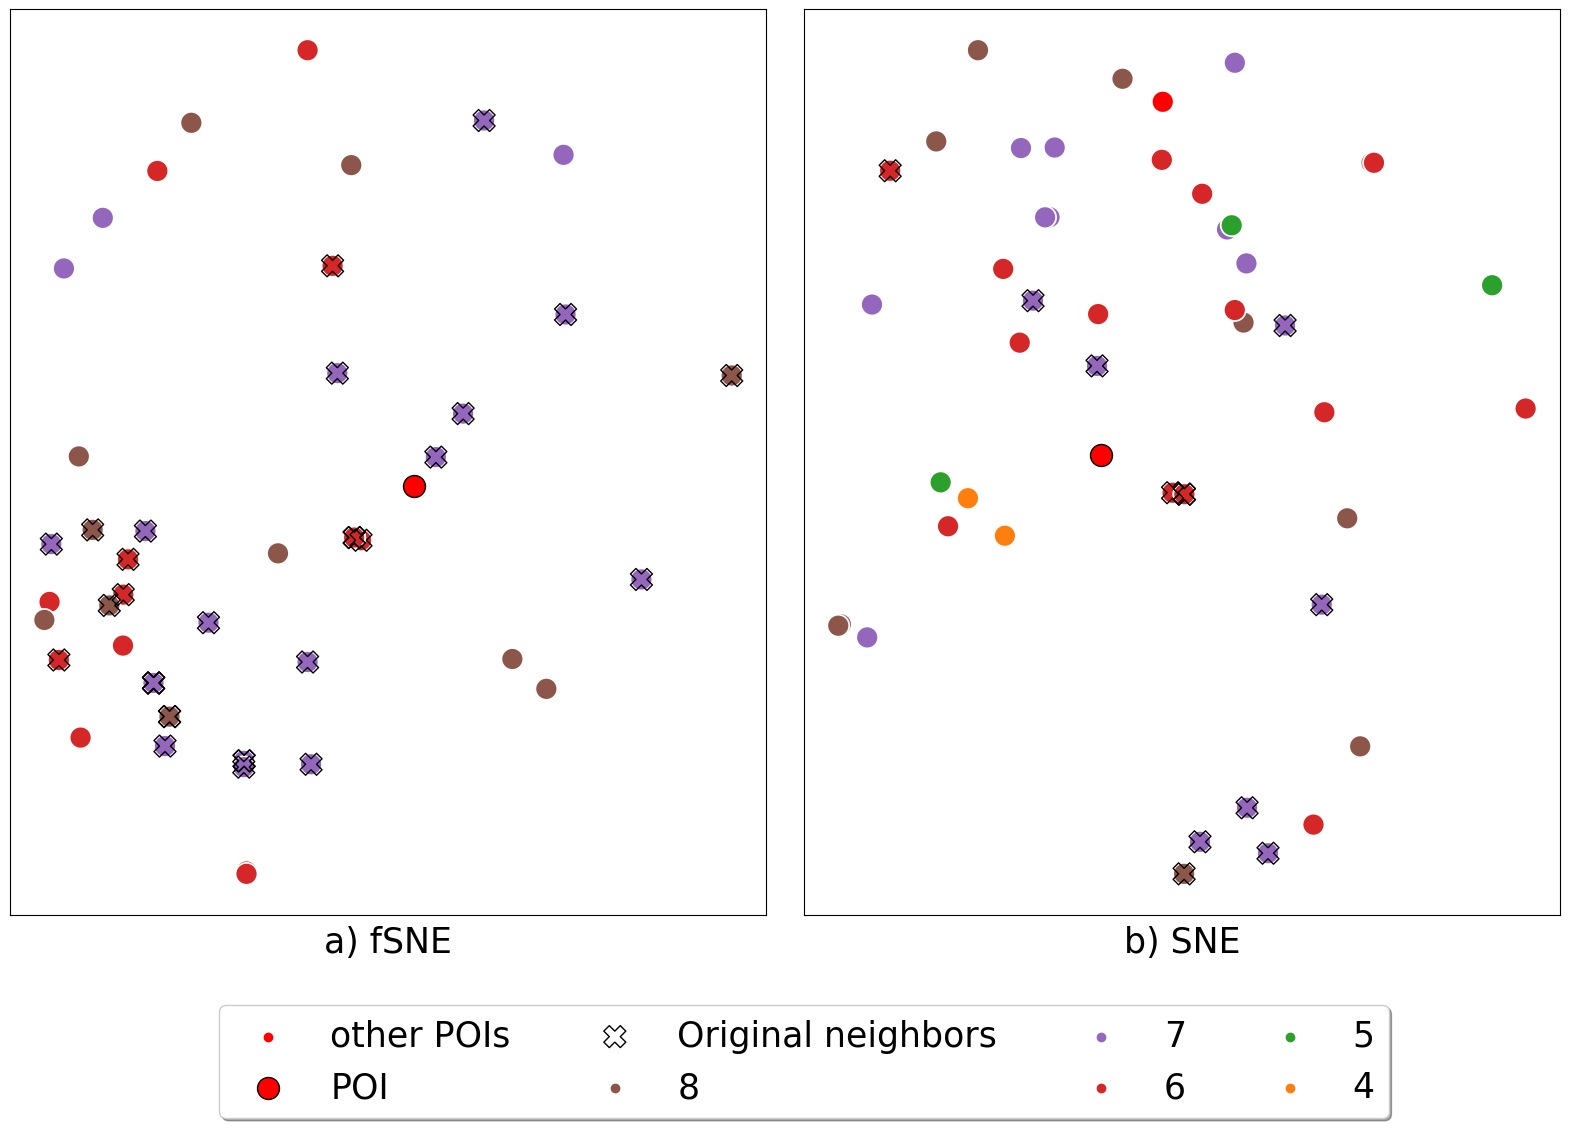

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


data_dir = 'Wine'
data_name = 'Wine'
run = '1'
poi = '1'
perp = '10'

if data_dir == '20News':
  data_name = '20news'
else:
  data_name = data_dir
model = 'fsne'
os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/fsne')
embedding_fsne = decompress_pickle(data_name+poi+'-fsne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/sne')
embedding_sne = decompress_pickle(data_name+poi+'-sne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/npy_data/')
data_perp = dict(np.load(data_dir+poi+'.npy',allow_pickle=True).item())
X_transformed, params, aug_labels = data_perp[list(data_perp.keys())[0]]


plot_label = ['a','b']
model_names = ['fSNE','SNE']#,'ASTM','PTM']

fig = plt.subplots(figsize=(20,12),dpi=100)
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.05, hspace=0.1) # set the spacing between axes.

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

embeddings = [embedding_fsne,embedding_sne]
axes = [ax1,ax2]
POI = params[5]
font_size = 25
poi_k =79
from sklearn.neighbors import NearestNeighbors
nbrs = 50

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(X_transformed)
neigh = knn.kneighbors(X_transformed[POI], return_distance=False)
neighPOI = neigh[:,1:]

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(embedding_fsne)
neigh = knn.kneighbors(embedding_fsne[POI], return_distance=False)
neighPOI_fsne = neigh[:,1:]

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(embedding_sne)
neigh = knn.kneighbors(embedding_sne[POI], return_distance=False)
neighPOI_sne = neigh[:,1:]
handles_l = []
labels_l = []
newLabels, newHandles = [], []
neighPOI_model = [neighPOI_fsne,neighPOI_sne]
for i in range(len(axes)):
  labels = np.asarray(aug_labels).astype('int')
  lim1 = 50
  lim2 = 50

  zx = embeddings[i]

  notPOI = [i for i in range(len(embeddings[i])) if i not in POI]

  POI_vis = zx[POI[poi_k]]
  common_neigh = list(set(neighPOI[poi_k]).intersection(set(neighPOI_model[i][poi_k])))
  POI_neigh_vis_original = zx[common_neigh]
  zx = zx[neighPOI_model[i][poi_k]]

  unique_labels = list(set(labels))

  labels_dict_o = {}
  for l in unique_labels:
    if l==99:
      # continue
      l='other POIs'
      labels_dict_o[l] ='red'#+str(unique_labels.index(l))
    else:
      labels_dict_o[l] ='C'+str(unique_labels.index(l))

  labels = labels[neighPOI_model[i][poi_k]]
  labels = ['other POIs' if l==99 else l for l in labels]
  g =sb.scatterplot(ax=axes[i],x=zx[:,0],y=zx[:,1],hue=labels,alpha=1,palette=labels_dict_o,s=250)
  g.legend_.remove()
  axes[i].set_xlabel(plot_label[i]+") "+model_names[i],fontsize = font_size)
  axes[i].set_yticklabels([])
  axes[i].set_xticklabels([])
  # axes[i].axes.xaxis.set_visible(False)
  axes[i].axes.yaxis.set_visible(False)
  axes[i].tick_params(axis=u'both', which=u'both',length=0)
  axes[i].scatter(POI_neigh_vis_original[:, 0], POI_neigh_vis_original[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=250,label='Original neighbors',marker='X')
  axes[i].scatter(POI_vis[0], POI_vis[1], alpha=1.0,  edgecolors='black', facecolors='red', s=250,label='POI')

  handles,labels = axes[i].get_legend_handles_labels()
  for handle, label in zip(handles, labels):
    if label not in newLabels:
      newLabels.append(label)
      newHandles.append(handle)

labels, handles = zip(*sorted(zip(newLabels, newHandles), key=lambda t: t[0],reverse=True))
plt.legend(handles=handles,labels=labels, loc='upper center', bbox_to_anchor=(0.0, -0.080), prop={'size': font_size},
        fancybox=True, shadow=True, ncol=4)
plt.savefig("original_fsne_sne_Wine.png", bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict
common_pts_original_fsne = defaultdict(list)
common_pts_original_sne = defaultdict(list)

# poi_k = 2
all_nbrs = [50]
for nbrs in all_nbrs:
  for poi_k in range(len(POI)):
    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(X_transformed)
    neigh = knn.kneighbors(X_transformed[POI], return_distance=False)
    neighPOI = neigh[:,1:]

    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(embedding_fsne)
    neigh = knn.kneighbors(embedding_fsne[POI], return_distance=False)
    neighPOI_fsne = neigh[:,1:]

    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(embedding_sne)
    neigh = knn.kneighbors(embedding_sne[POI], return_distance=False)
    neighPOI_sne = neigh[:,1:]

    common_pts_original_fsne[POI[poi_k]].append(len(set(neighPOI[poi_k]).intersection(set(neighPOI_fsne[poi_k]))))
    common_pts_original_sne[POI[poi_k]].append(len(set(neighPOI[poi_k]).intersection(set(neighPOI_sne[poi_k]))))

fsne_POIs = [sum(common_pts_original_fsne[poi]) for poi in POI]
sne_POIs = [sum(common_pts_original_sne[poi]) for poi in POI]

In [ ]:
max(np.asarray(fsne_POIs) - np.asarray(sne_POIs))

15

In [ ]:
np.where(np.asarray(fsne_POIs) - np.asarray(sne_POIs) ==15)

(array([17]),)

In [ ]:
font_size = 25

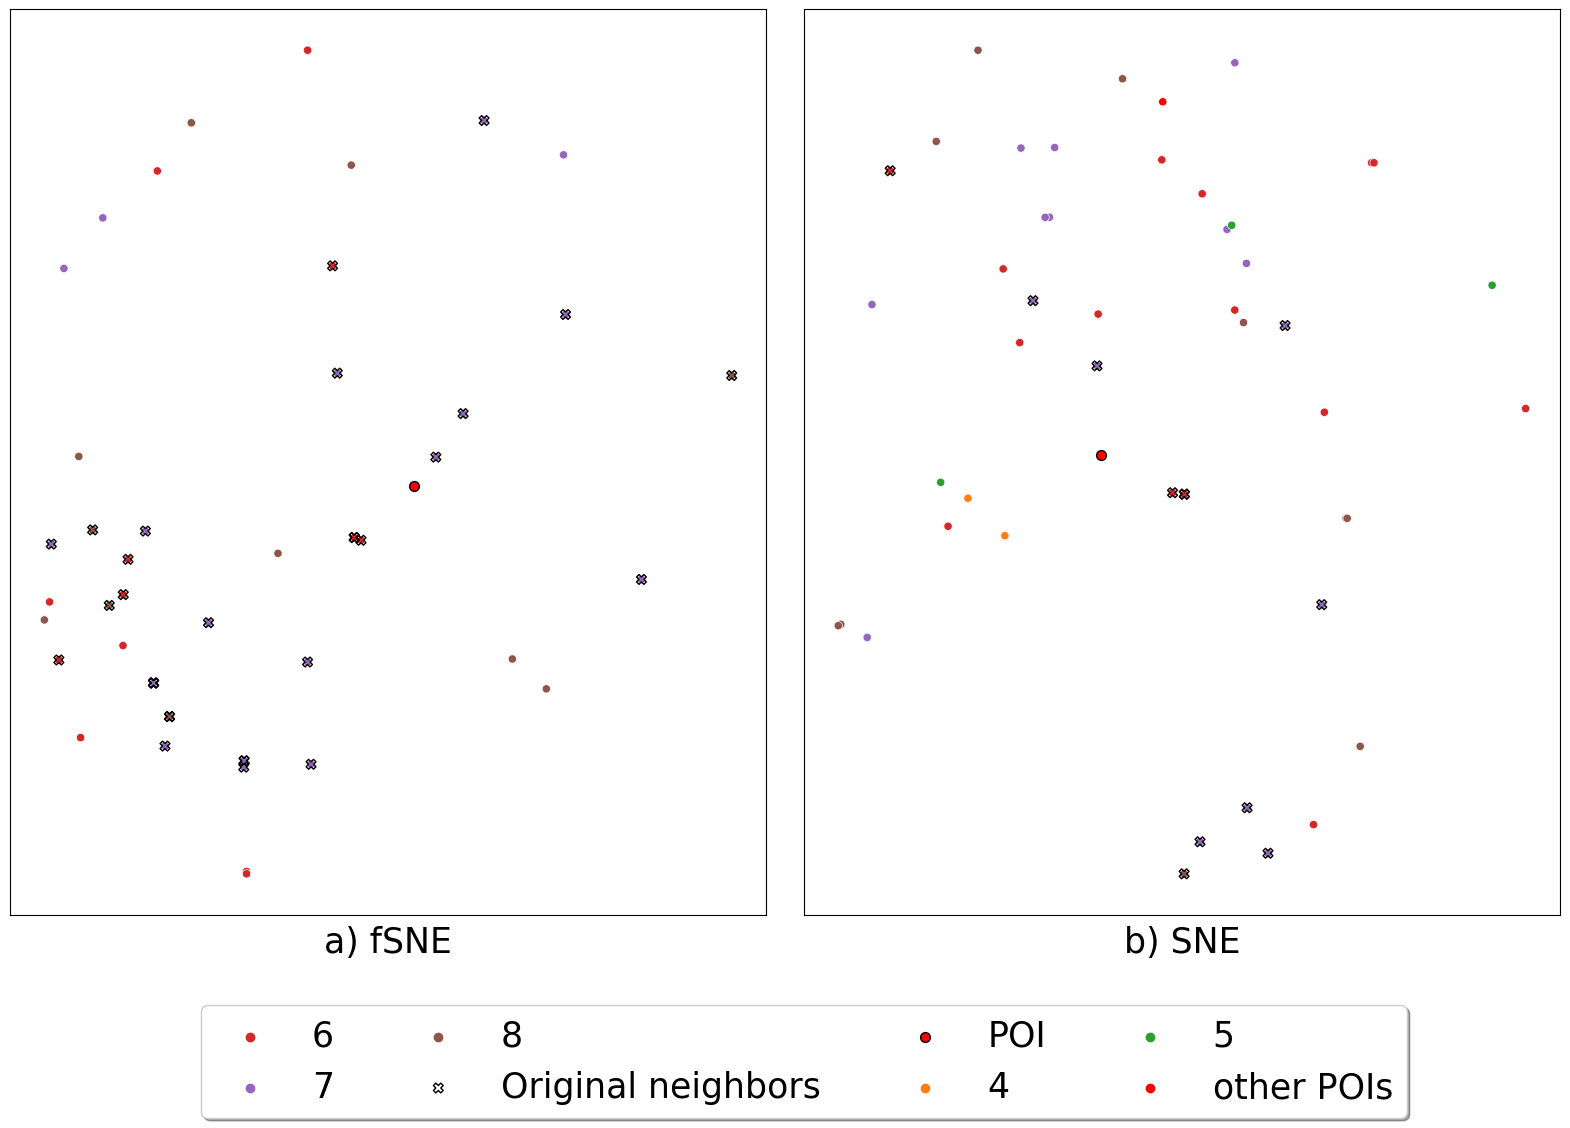

In [ ]:
import matplotlib.pyplot as plt
import numpy as np


data_dir = 'Wine'
data_name = 'Wine'
run = '1'
poi = '1'
perp = '10'

if data_dir == '20News':
  data_name = '20news'
else:
  data_name = data_dir
model = 'fsne'
os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/fsne')
embedding_fsne = decompress_pickle(data_name+poi+'-fsne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/embeddings/'+data_dir+'/sne')
embedding_sne = decompress_pickle(data_name+poi+'-sne-run_'+run+'_perp'+perp)

os.chdir('/home/student_no_backup/sakumar/REU2022/LAPS_GAPS_kNN/npy_data/')
data_perp = dict(np.load(data_dir+poi+'.npy',allow_pickle=True).item())
X_transformed, params, aug_labels = data_perp[list(data_perp.keys())[0]]


plot_label = ['a','b']
model_names = ['fSNE','SNE']#,'ASTM','PTM']

fig = plt.subplots(figsize=(20,12),dpi=100)
gs = gridspec.GridSpec(1, 2)
gs.update(wspace=0.05, hspace=0.1) # set the spacing between axes.

ax1 = plt.subplot(gs[0, 0])
ax2 = plt.subplot(gs[0, 1])

embeddings = [embedding_fsne,embedding_sne]
axes = [ax1,ax2]
POI = params[5]

poi_k =79
from sklearn.neighbors import NearestNeighbors
nbrs = 50

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(X_transformed)
neigh = knn.kneighbors(X_transformed[POI], return_distance=False)
neighPOI = neigh[:,1:]

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(embedding_fsne)
neigh = knn.kneighbors(embedding_fsne[POI], return_distance=False)
neighPOI_fsne = neigh[:,1:]

knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
knn.fit(embedding_sne)
neigh = knn.kneighbors(embedding_sne[POI], return_distance=False)
neighPOI_sne = neigh[:,1:]
handles_l = []
labels_l = []
newLabels, newHandles = [], []
neighPOI_model = [neighPOI_fsne,neighPOI_sne]
for i in range(len(axes)):
  labels = np.asarray(aug_labels).astype('int')
  lim1 = 50
  lim2 = 50

  zx = embeddings[i]

  notPOI = [i for i in range(len(embeddings[i])) if i not in POI]

  POI_vis = zx[POI[poi_k]]
  common_neigh = list(set(neighPOI[poi_k]).intersection(set(neighPOI_model[i][poi_k])))
  POI_neigh_vis_original = zx[common_neigh]
  zx = zx[neighPOI_model[i][poi_k]]

  unique_labels = list(set(labels))

  labels_dict_o = {}
  for l in unique_labels:
    if l==99:
      # continue
      l='other POIs'
      labels_dict_o[l] ='red'#+str(unique_labels.index(l))
    else:
      labels_dict_o[l] ='C'+str(unique_labels.index(l))

  labels = labels[neighPOI_model[i][poi_k]]
  labels = ['other POIs' if l==99 else l for l in labels]
  g =sb.scatterplot(ax=axes[i],x=zx[:,0],y=zx[:,1],hue=labels,alpha=1,palette=labels_dict_o)
  g.legend_.remove()
  axes[i].set_xlabel(plot_label[i]+") "+model_names[i],fontsize = font_size)
  axes[i].set_yticklabels([])
  axes[i].set_xticklabels([])
  # axes[i].axes.xaxis.set_visible(False)
  axes[i].axes.yaxis.set_visible(False)
  axes[i].tick_params(axis=u'both', which=u'both',length=0)
  axes[i].scatter(POI_neigh_vis_original[:, 0], POI_neigh_vis_original[:, 1], alpha=1.0,  edgecolors='black', facecolors='none', s=50,label='Original neighbors',marker='X')
  axes[i].scatter(POI_vis[0], POI_vis[1], alpha=1.0,  edgecolors='black', facecolors='red', s=50,label='POI')

  handles,labels = axes[i].get_legend_handles_labels()
  for handle, label in zip(handles, labels):
    if label not in newLabels:
      newLabels.append(label)
      newHandles.append(handle)

plt.legend(handles=newHandles,labels=newLabels, loc='upper center', bbox_to_anchor=(0.0, -0.080), prop={'size': font_size},
        fancybox=True, shadow=True, ncol=4)
plt.savefig("original_fsne_sne_Wine.png", bbox_inches='tight')
plt.show()

In [ ]:
from sklearn.neighbors import NearestNeighbors
from collections import defaultdict
common_pts_original_fsne = defaultdict(list)
common_pts_original_sne = defaultdict(list)

# poi_k = 2
all_nbrs = [50]
for nbrs in all_nbrs:
  for poi_k in range(len(POI)):
    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(X_transformed)
    neigh = knn.kneighbors(X_transformed[POI], return_distance=False)
    neighPOI = neigh[:,1:]

    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(embedding_fsne)
    neigh = knn.kneighbors(embedding_fsne[POI], return_distance=False)
    neighPOI_fsne = neigh[:,1:]

    knn = NearestNeighbors(leaf_size=30, n_neighbors=nbrs, p=2, radius=1.0, algorithm='brute') # ball_tree
    knn.fit(embedding_sne)
    neigh = knn.kneighbors(embedding_sne[POI], return_distance=False)
    neighPOI_sne = neigh[:,1:]

    common_pts_original_fsne[POI[poi_k]].append(len(set(neighPOI[poi_k]).intersection(set(neighPOI_fsne[poi_k]))))
    common_pts_original_sne[POI[poi_k]].append(len(set(neighPOI[poi_k]).intersection(set(neighPOI_sne[poi_k]))))

fsne_POIs = [sum(common_pts_original_fsne[poi]) for poi in POI]
sne_POIs = [sum(common_pts_original_sne[poi]) for poi in POI]

In [ ]:
max(np.asarray(fsne_POIs) - np.asarray(sne_POIs))

18

In [ ]:
np.where(np.asarray(fsne_POIs) - np.asarray(sne_POIs) ==18)

(array([79]),)